# Exploratory Data Analysis

## Motivation 
Have a better understanding of Fetal Health dataset.

## Objective
    1- Detect missing data
    2- Detect outliers

## Data description
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

- Normal
- Suspect
- Pathological

[Kaggle Link](https://www.kaggle.com/andrewmvd/fetal-health-classification)

## Load data and quick overview

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# create folder to save eda images:
DIR_EDA_IMAGES = '/resources/eda/images'
os.makedirs(DIR_EDA_IMAGES, exist_ok=True)

In [3]:
df = pd.read_csv('/resources/fetal_health.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [5]:
df.fetal_health.value_counts(normalize=True)

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

In [6]:
df.sample(5)

baseline value  accelerations  fetal_movement  uterine_contractions  \
1388           121.0          0.005             0.0                 0.008   
1254           118.0          0.001             0.0                 0.003   
172            119.0          0.001             0.0                 0.004   
864            142.0          0.002             0.0                 0.003   
1408           145.0          0.005             0.0                 0.004   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
1388                0.002                   0.0                       0.0   
1254                0.001                   0.0                       0.0   
172                 0.001                   0.0                       0.0   
864                 0.000                   0.0                       0.0   
1408                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
1388                             37.0                                   0.9   
1254                             26.0                                   1.4   
172                              29.0                                   1.3   
864                              45.0                                   0.7   
1408                             51.0                                   0.7   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
1388                                                0.0       ...   
1254                                                0.0       ...   
172                                                 2.0       ...   
864                                                16.0       ...   
1408                                                5.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
1388           82.0          153.0                        5.0   
1254           94.0          150.0                        3.0   
172            77.0          166.0                        3.0   
864           135.0          159.0                        0.0   
1408          104.0          171.0                        5.0   

      histogram_number_of_zeroes  histogram_mode  histogram_mean  \
1388                         0.0           150.0           128.0   
1254                         0.0           120.0           118.0   
172                          1.0           121.0           121.0   
864                          0.0           150.0           149.0   
1408                         0.0           149.0           153.0   

      histogram_median  histogram_variance  histogram_tendency  fetal_health  
1388             130.0                68.0                 1.0           1.0  
1254             119.0                 6.0                 0.0           1.0  
172              123.0                 4.0                 0.0           1.0  
864              150.0                 1.0                 0.0           1.0  
1408             154.0                 5.0                 1.0           1.0  

[5 rows x 22 columns]

In [7]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

## Looking for good groups of pairs features  
We're going to analyze 4 groups:  
    1- Non grouped features  
    2- Decelerations information  
    3- Term Variability information  
    4- Histogram information  

In [8]:
COLUMN_GROUP_ALONE = [
    'baseline value',
    'accelerations',
    'fetal_movement',
    'uterine_contractions',
    'fetal_health']
COLUMN_GROUP_DECELERATIONS = [c for c in df.columns if 'decelerations' in c] + ['fetal_health']
COLUMN_GROUP_TERM_VARIABILITY = [c for c in df.columns if 'term_variability' in c] + ['fetal_health']
COLUMN_GROUP_HISTOGRAM = [c for c in df.columns if 'histogram' in c] + ['fetal_health']

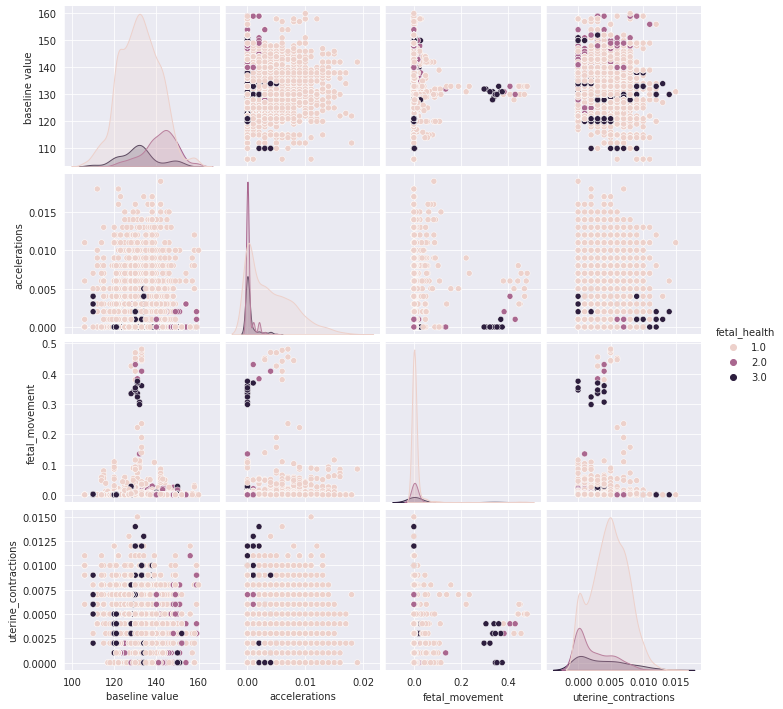

In [9]:
sns_plot = sns.pairplot(df[COLUMN_GROUP_ALONE], hue='fetal_health')
sns_plot.savefig(f'{DIR_EDA_IMAGES}/pairplot_non_grouped.png')

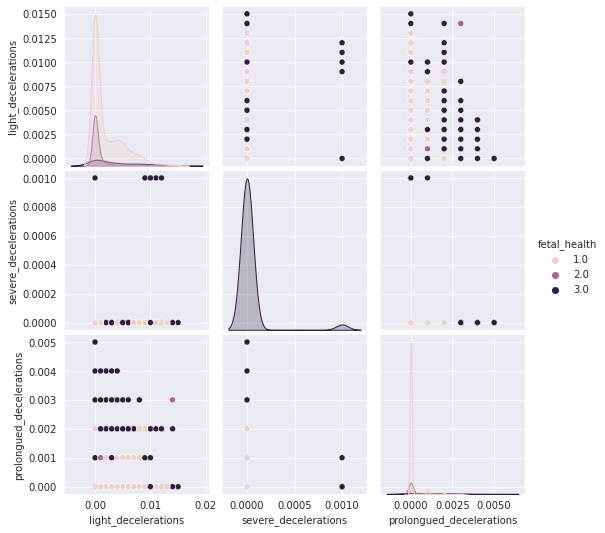

In [10]:
sns_plot = sns.pairplot(df[COLUMN_GROUP_DECELERATIONS], hue='fetal_health')
sns_plot.savefig(f'{DIR_EDA_IMAGES}/pairplot_decelerations.png')

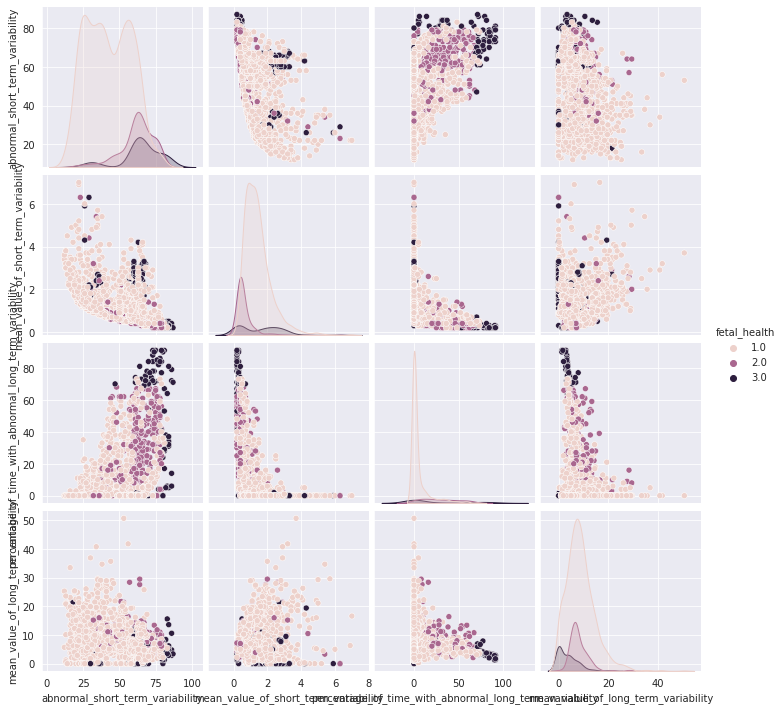

In [11]:
sns_plot = sns.pairplot(df[COLUMN_GROUP_TERM_VARIABILITY], hue='fetal_health')
sns_plot.savefig(f'{DIR_EDA_IMAGES}/pairplot_term_variability.png')

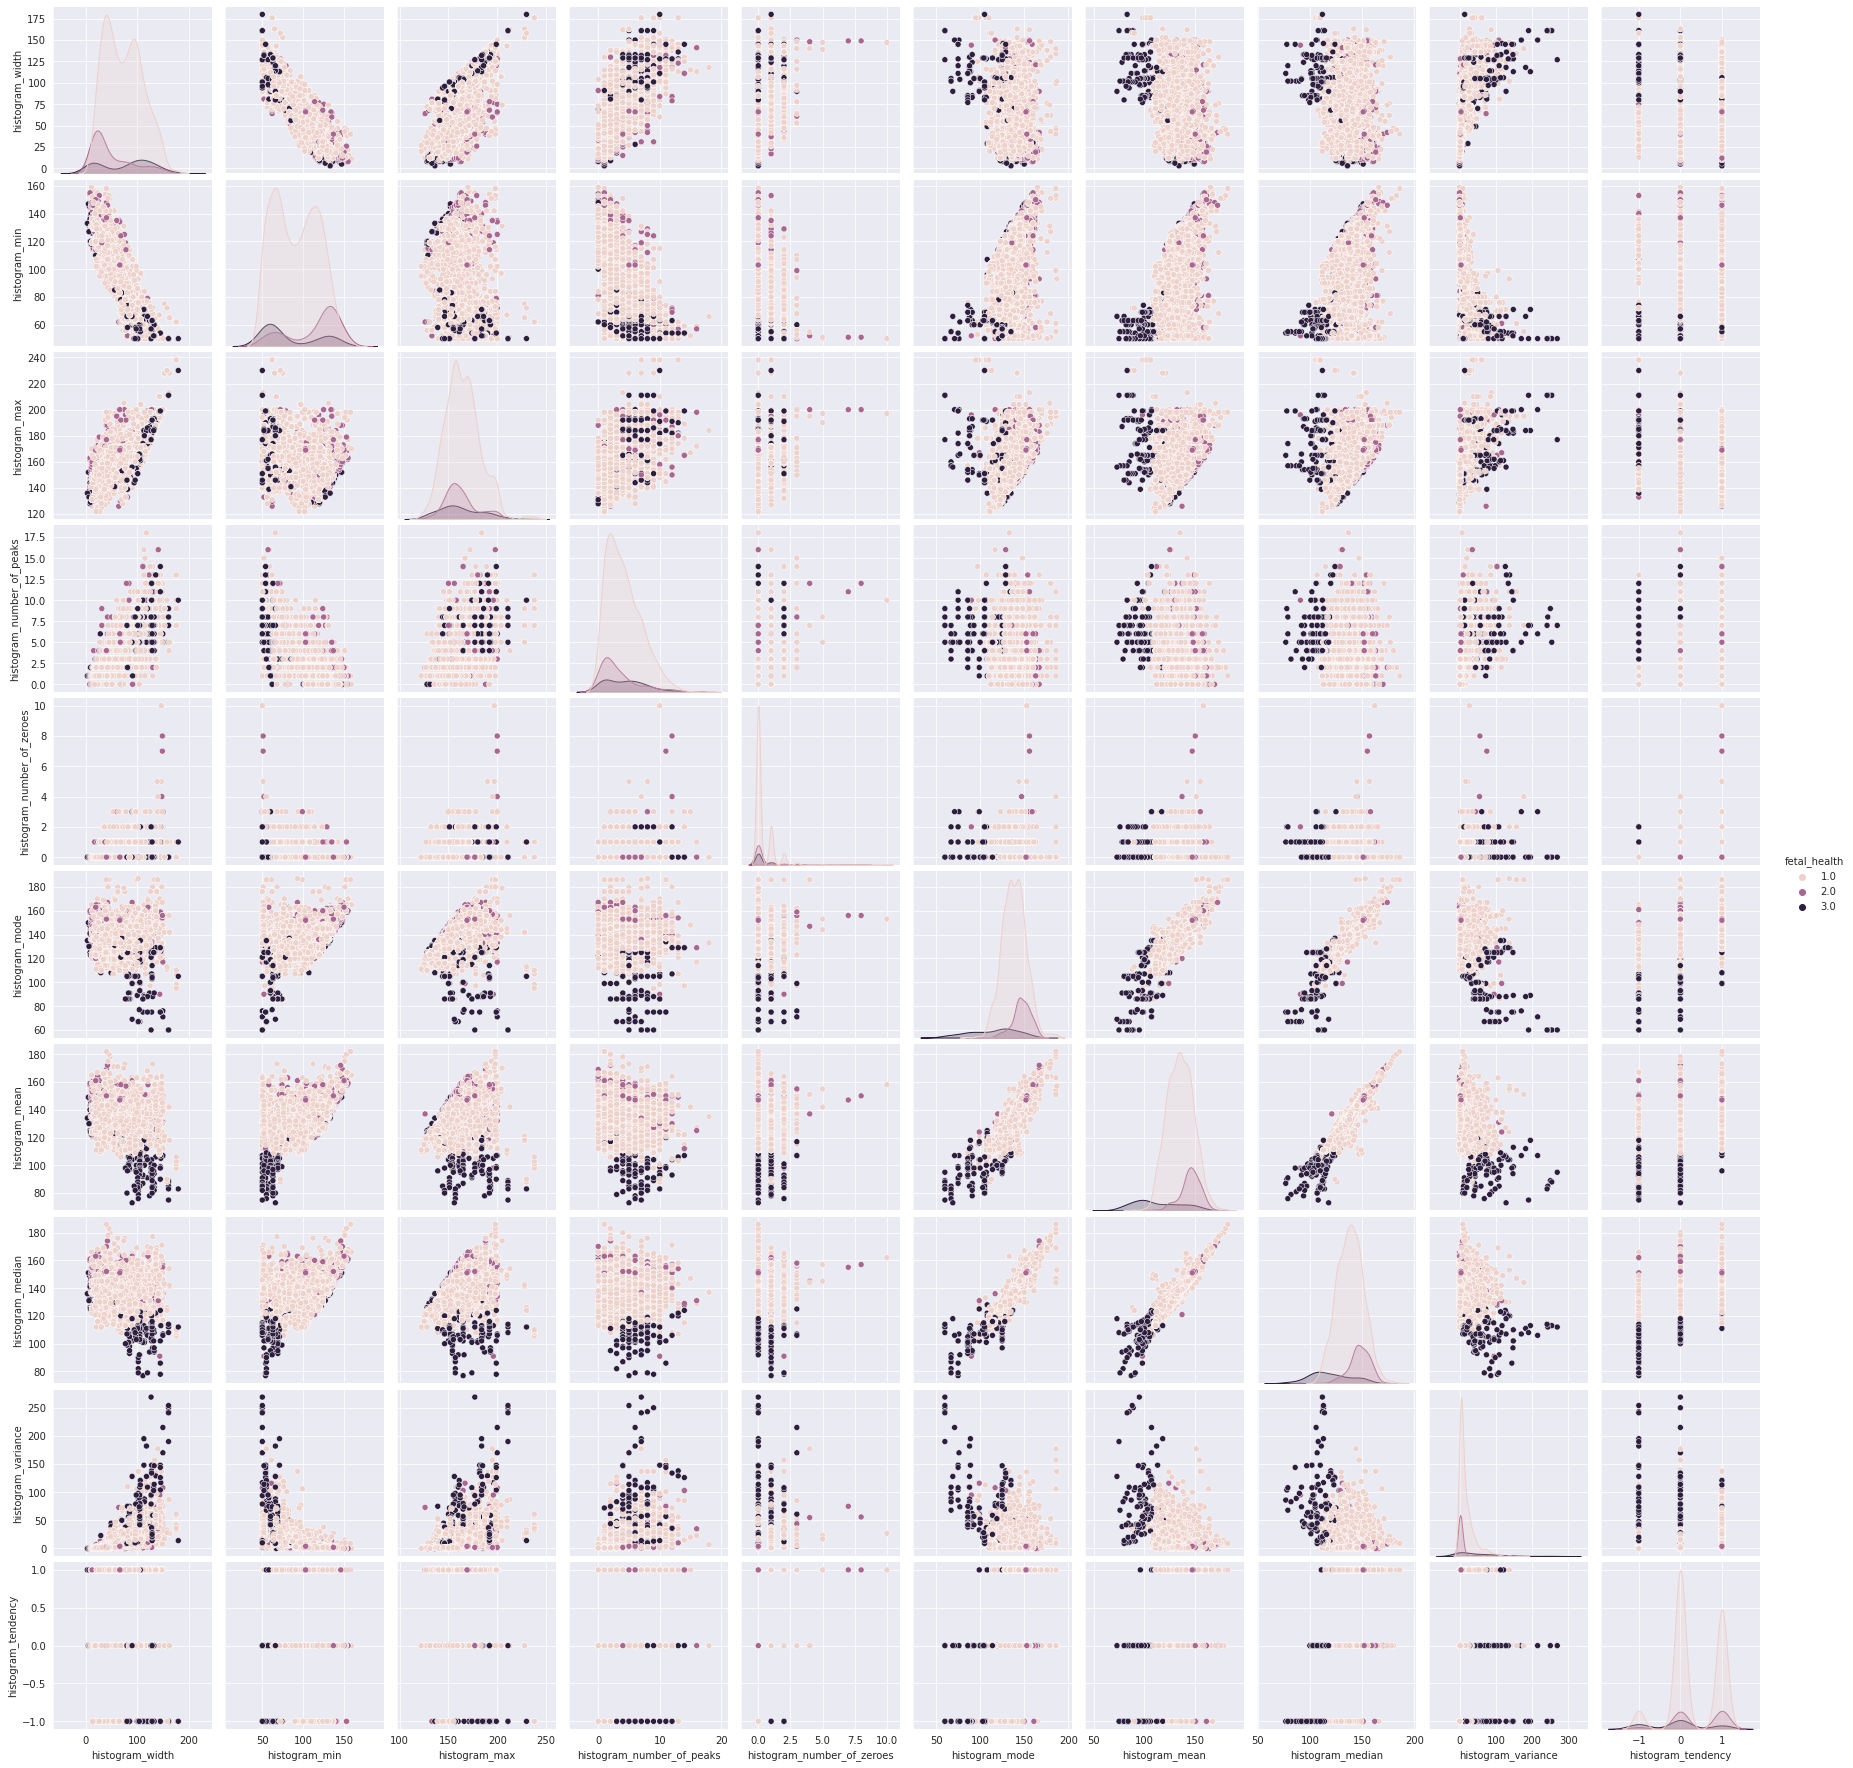

In [12]:
sns_plot = sns.pairplot(df[COLUMN_GROUP_HISTOGRAM], hue='fetal_health')
sns_plot.savefig(f'{DIR_EDA_IMAGES}/pairplot_histogram.png')

## Distribution of each feature

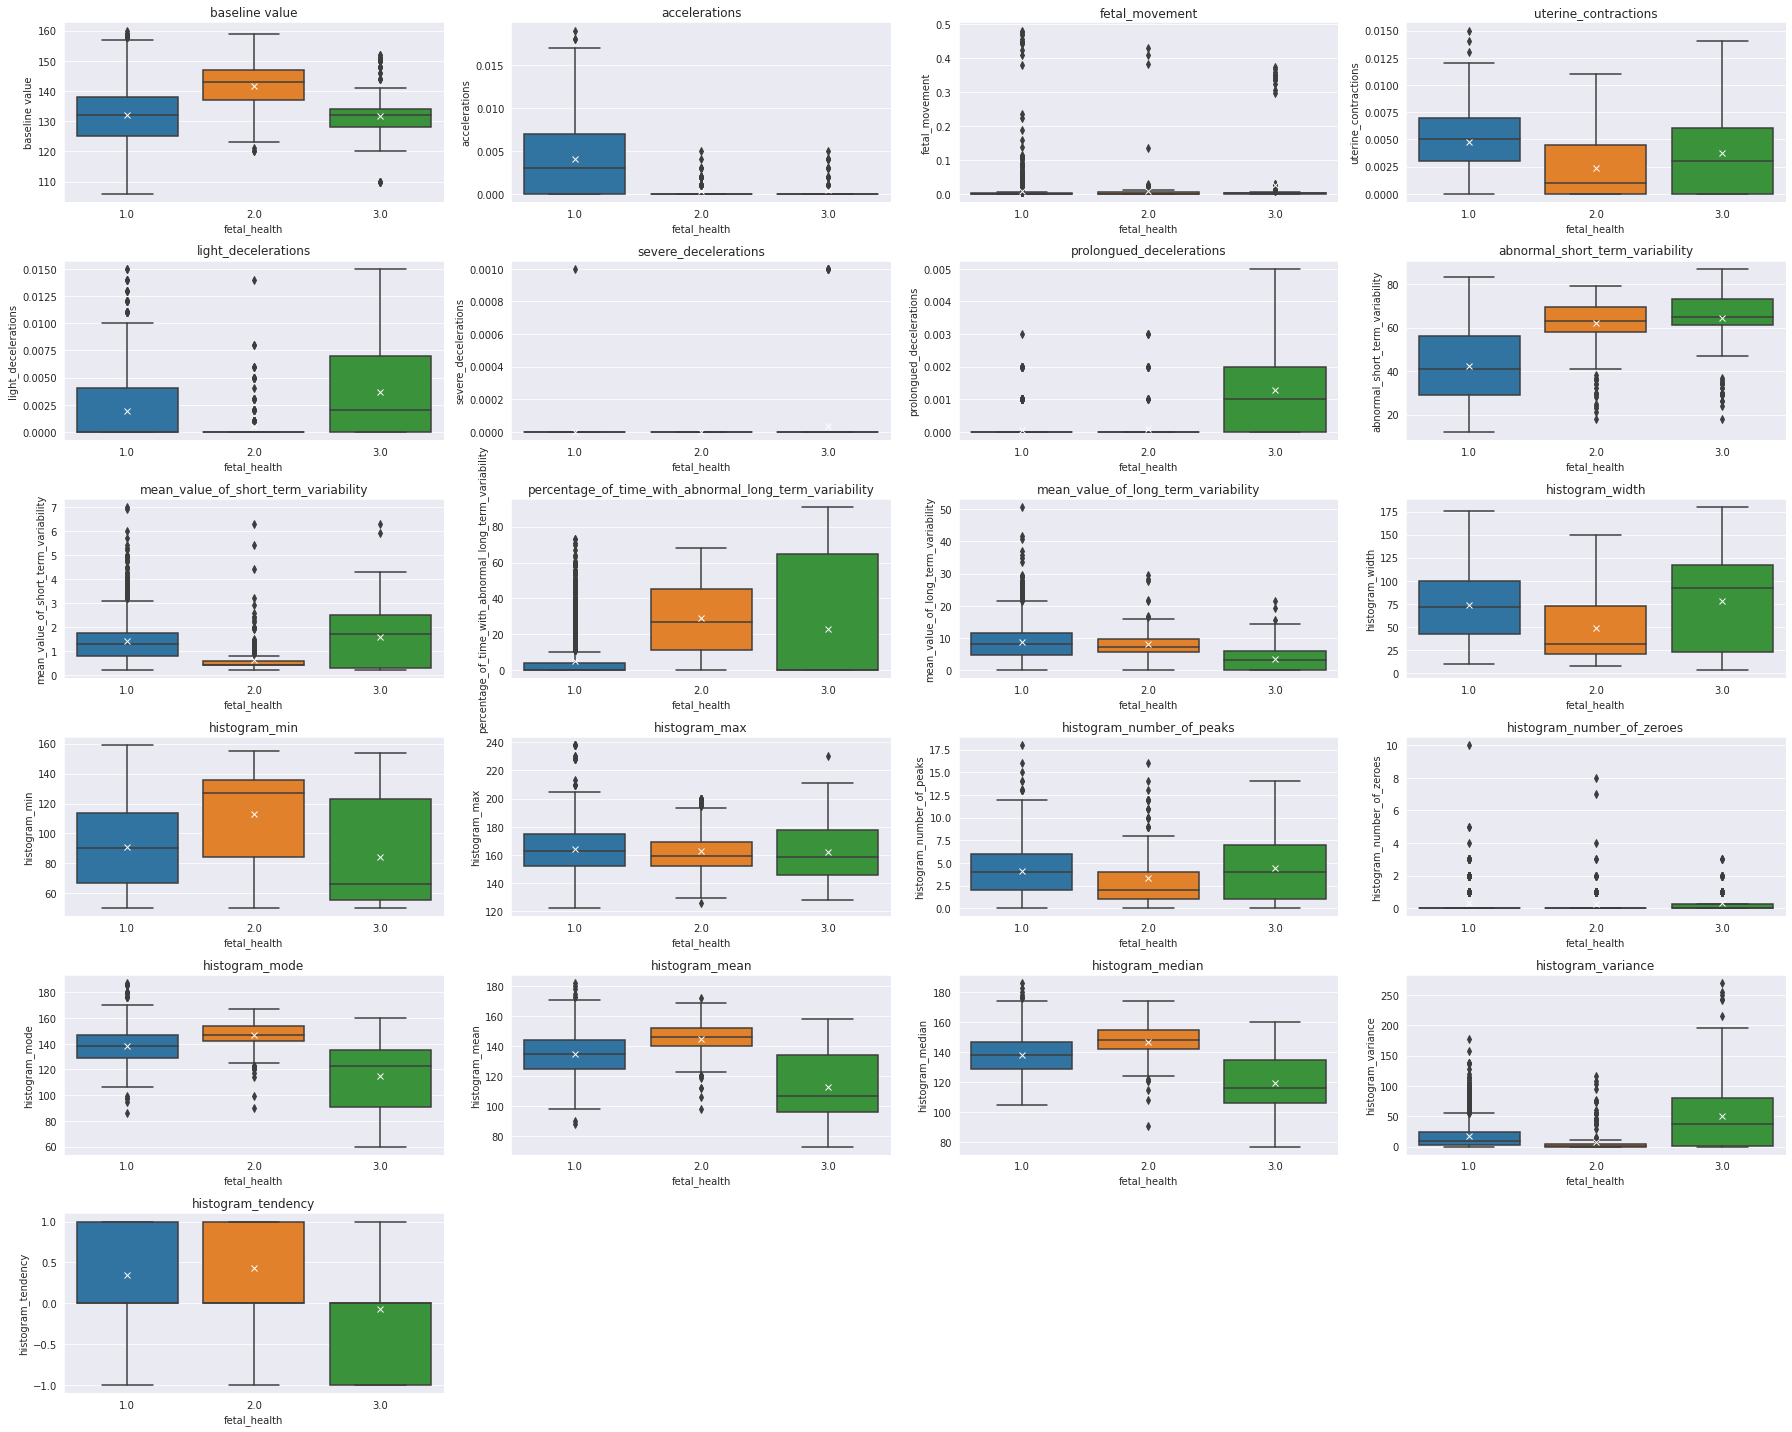

In [42]:
plt.figure(figsize=(25, 20))

for i, column in enumerate(df.columns):
    if column == 'fetal_health':
        continue
    plt.subplot(6, 4, i + 1)
#     sns.stripplot(data=df, y=column, x='fetal_health', color='.5', size=2)
    sns.boxplot(data=df, y=column, x='fetal_health', showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'})
    plt.title(column)
#     break
plt.tight_layout()
plt.savefig(f'{DIR_EDA_IMAGES}/boxplots.png')
plt.show()

<Figure size 1800x1440 with 0 Axes>

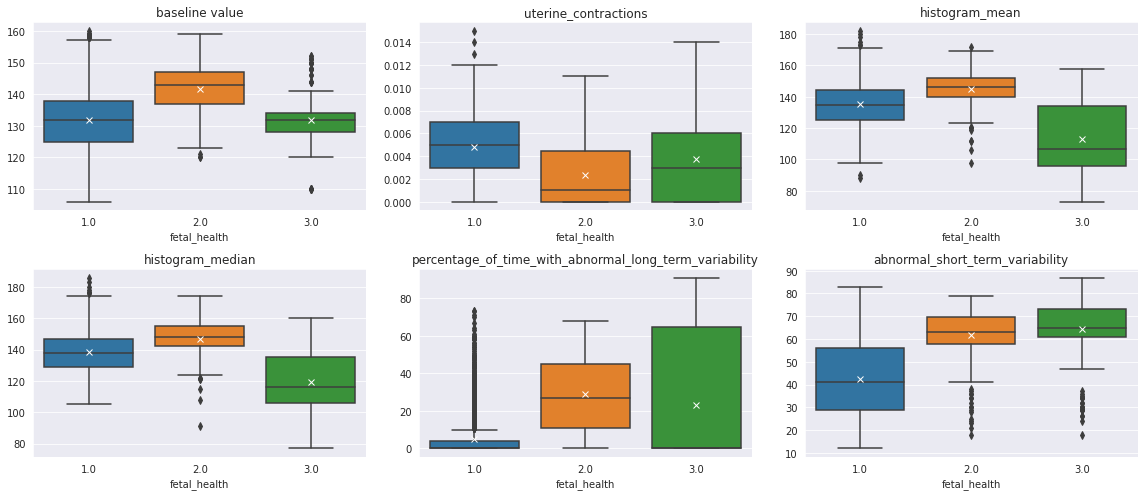

In [55]:
# important columns
plt.figure(figsize=(25, 20))
cols = ['baseline value','uterine_contractions','histogram_mean','histogram_median',
        'percentage_of_time_with_abnormal_long_term_variability','abnormal_short_term_variability']

plt.figure(figsize=(16,7))
for i, column in enumerate(cols):
    if column == 'fetal_health':
        continue
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=column, x='fetal_health', showmeans=True, meanprops={'marker':'x','markeredgecolor':'w'})
    plt.ylabel('')
    plt.title(column)
#     break
plt.tight_layout()
plt.savefig(f'{DIR_EDA_IMAGES}/boxplots.png')
plt.show()

## Visualizamos con PCA y T-SNE

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
# preparamos los datos para reducir dimensionalidad
X = df.iloc[:,:-1]
y = df['fetal_health']

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

(2126, 21)
(2126, 2)


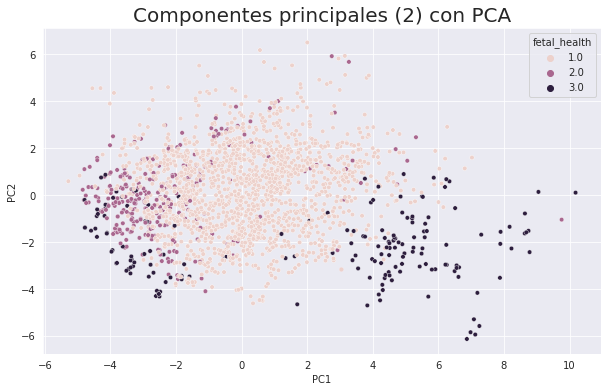

In [38]:
pca_std = PCA(n_components=2, random_state=42)
proy_std = pca_std.fit_transform(X_std)
print(X.shape)
print(proy_std.shape)

proy_std = pd.DataFrame(proy_std, columns = ['PC1','PC2'])
plt.figure(figsize=(10,6)),plt.title('Componentes principales (2) con PCA', fontsize=20)
sns.scatterplot(data=proy_std, x='PC1', y='PC2', hue=y, s=20),plt.show();

(2126, 21)
(2126, 3)


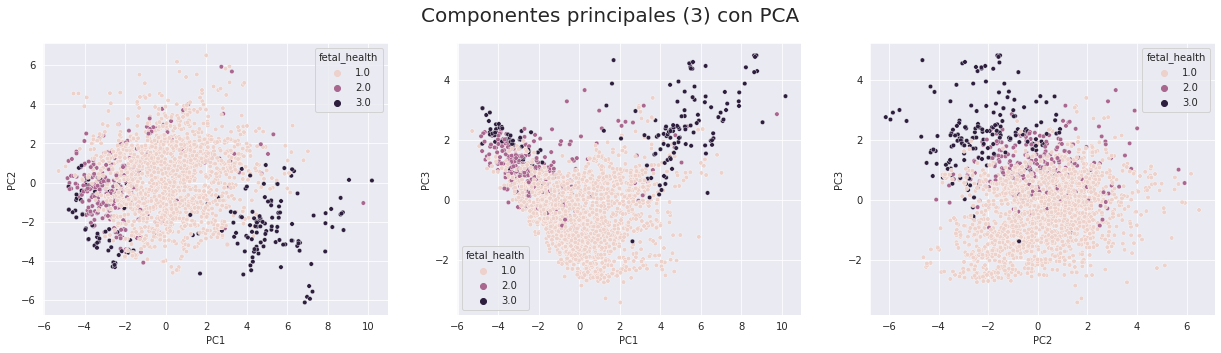

In [40]:
pca_std = PCA(n_components=3, random_state=42)
proy_std = pca_std.fit_transform(X_std)
print(X.shape)
print(proy_std.shape)

proy_std = pd.DataFrame(proy_std, columns = ['PC1','PC2','PC3'])

fig, ax = plt.subplots(1,3,figsize=(21,5))
plt.suptitle('Componentes principales (3) con PCA', fontsize=20)
sns.scatterplot(data=proy_std, x='PC1', y='PC2', hue=y, s=20, ax=ax[0])
sns.scatterplot(data=proy_std, x='PC1', y='PC3', hue=y, s=20, ax=ax[1])
sns.scatterplot(data=proy_std, x='PC2', y='PC3', hue=y, s=20, ax=ax[2]),
plt.savefig(f'{DIR_EDA_IMAGES}/pca_3components.png'),plt.show();

In [18]:
from sklearn.manifold import TSNE

(2126, 21)
(2126, 3)


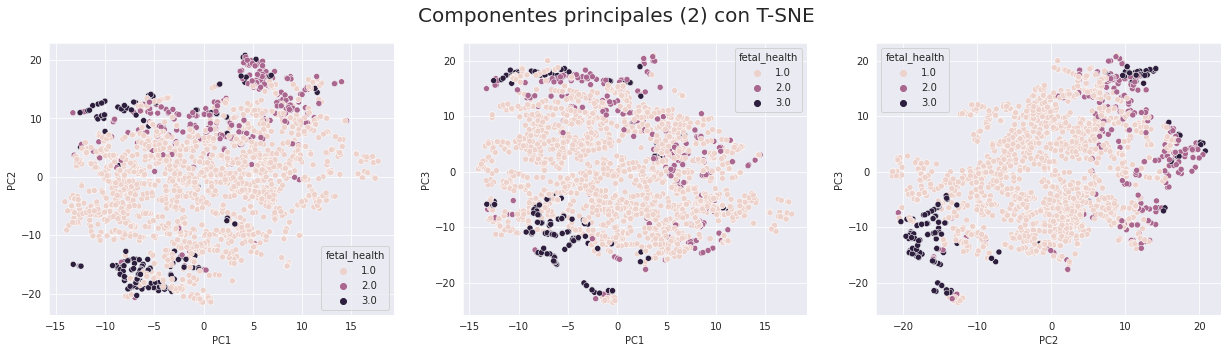

In [21]:
tsne_std = TSNE(n_components=3, random_state=42)
proy_std = tsne_std.fit_transform(X_std)
print(X.shape)
print(proy_std.shape)

proy_std = pd.DataFrame(proy_std, columns = ['PC1','PC2','PC3'])
# plt.figure(figsize=(10,6)),plt.title('Componentes principales (2) con T-SNE', fontsize=20)
# sns.scatterplot(data=proy_std, x='PC1', y='PC2', hue=y)
# plt.savefig(f'{DIR_EDA_IMAGES}/pca_3components.png'),plt.show();

fig, ax = plt.subplots(1,3,figsize=(21,5))
plt.suptitle('Componentes principales (2) con T-SNE', fontsize=20)
sns.scatterplot(data=proy_std, x='PC1', y='PC2', hue=y, ax=ax[0])
sns.scatterplot(data=proy_std, x='PC1', y='PC3', hue=y, ax=ax[1])
sns.scatterplot(data=proy_std, x='PC2', y='PC3', hue=y, ax=ax[2]),
plt.savefig(f'{DIR_EDA_IMAGES}/tsne_3components.png'),plt.show();